# Installing Libraries

Links:

https://ajuda.decea.mil.br/base-de-conhecimento/como-decodificar-o-metar-e-o-speci/
https://unidata.github.io/MetPy/latest/api/generated/metpy.io.parse_metar_to_dataframe.html#metpy.io.parse_metar_to_dataframe

## Getting to know the Data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from metpy.io import parse_metar_to_dataframe

# Example METAR string
metar_string = "METAR SBSP 011000Z 10003KT 8000 -RA SCT009 OVC011 15/14 Q1020="

# Parsing METAR string to DataFrame
metar_df = parse_metar_to_dataframe(metar_string)

# Displaying the DataFrame
metar_df


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
SBSP,SBSP,-23.62,-46.63,803,2024-04-01 10:00:00,100,3.0,NaN,8000,-RA,...,15.0,14.0,30.12,61,0,0,,1019.51,-2.954423,0.520945


In [8]:
metar_df.columns

Index(['station_id', 'latitude', 'longitude', 'elevation', 'date_time',
       'wind_direction', 'wind_speed', 'wind_gust', 'visibility',
       'current_wx1', 'current_wx2', 'current_wx3', 'low_cloud_type',
       'low_cloud_level', 'medium_cloud_type', 'medium_cloud_level',
       'high_cloud_type', 'high_cloud_level', 'highest_cloud_type',
       'highest_cloud_level', 'cloud_coverage', 'air_temperature',
       'dew_point_temperature', 'altimeter', 'current_wx1_symbol',
       'current_wx2_symbol', 'current_wx3_symbol', 'remarks',
       'air_pressure_at_sea_level', 'eastward_wind', 'northward_wind'],
      dtype='object')

In [17]:
metar_df[['station_id', 'latitude', 'longitude', 'elevation', 'date_time',
       'wind_direction', 'wind_speed', 'wind_gust', 'visibility']]
#The descriptive feature of the flight
         

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility
station_id,,,,,,,,,
SBSP,SBSP,-23.62,-46.63,803,2024-04-01 10:00:00,100,3.0,NaN,8000


In [10]:
metar_df[["current_wx1","current_wx2","current_wx3"]]

#Indicadores de tempo presente. Se forem observados mais de um fenômeno, serão codificados grupos separados, 
#até o máximo de três. No entanto, se for observada mais de uma forma de precipitação, serão combinadas num único
#grupo com o tipo de precipitação predominante reportado na frente.


,current_wx1,current_wx2,current_wx3
station_id,,,
SBSP,-RA,NaN,NaN


In [12]:
metar_df[["low_cloud_type","low_cloud_level", "medium_cloud_type", "medium_cloud_level","high_cloud_type","high_cloud_level"]]

#1 a 2 oitavos serão informados como FEW (Few) 
#3 a 4 oitavos serão informados como SCT (Scattered) 
#5 a 7 oitavos serão informados como BKN (Broken) 
#8 oitavos será informado como OVC (Overcast) 

,low_cloud_type,low_cloud_level,medium_cloud_type,medium_cloud_level,high_cloud_type,high_cloud_level
station_id,,,,,,
SBSP,SCT,900.0,OVC,1100.0,NaN,NaN


In [13]:
metar_df[["air_temperature","dew_point_temperature"]]
#air_temperatura ~= dew_point_temperature --> ÚMIDO
#air_temperatura >> dew_point_temperature --> SECO

,air_temperature,dew_point_temperature
station_id,,
SBSP,15.0,14.0


In [15]:
metar_df[["remarks",'air_pressure_at_sea_level', 'eastward_wind', 'northward_wind']]
#I am not considering it for the first part

,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,
SBSP,,1019.51,-2.954423,0.520945


## Handling the actual data

### Functions created to be used

In [57]:
#When working with categorical classification prediction, is required to use Categorical Values to Numeric
#so will be created a functin to do this transformation

def categorical_to_numerical(df):
    #Before assigning the numbers, we should fillna
    columns_to_fill =["low_cloud_type", "current_wx1", "current_wx2", "current_wx3",
                      "medium_cloud_type", "high_cloud_type", "highest_cloud_type"]
    df[columns_to_fill] = df[columns_to_fill].fillna('OUTROS')
    pd.set_option('future.no_silent_downcasting', True)

    #df1["origem"].value_counts()
    mapping = {'SBSP'    :1,'SBRJ'    :2,'SBGR'     :3,'SBBR'     :4, 'SBCF'     :5, 'SBPA'    :6,
               'SBKP'   :7, 'SBCT'   :8, 'SBRF'     :9, 'SBSV'     :10, 'SBFL'    :11, 'SBGL'    :12}
    df['origem'] = df['origem'].replace(mapping)
    df['destino'] = df['destino'].replace(mapping)

    #df1["low_cloud_type"].value_counts()
    mapping = {'OUTROS':0, 'FEW': 1, 'SCT': 2, 'BKN': 3, 'OVC': 4, 'NSC': 5, 'NCD': 6, 'VV': 7}
    df['low_cloud_type'] = df['low_cloud_type'].replace(mapping)

    df["current_wx1"].value_counts()
    mapping = {'OUTROS': 0, 'BR': 1,  'VCSH': 2,'FG': 3,'RA': 4,'BCFG': 5,'VCTS': 6,
               'TSRA': 7,   'SHRA': 8,'TS': 9,'HZ': 10,'MIFG': 11,'PRFG': 12,'VCFG': 13,'DZ': 14,
               "\"-RA":15,    "\"-DZ":16, "\"-TSRA":17, "\"-SHRA":18, "\"-RADZ":19, "\"-DZRA":20, "\"-FZDZ":21,
               "DZRA":22, "RADZ": 23, "TSGR":24 }
    
  
    df['current_wx1'] = df['current_wx1'].replace(mapping)
    df['current_wx2'] = df['current_wx2'].replace(mapping)
    df['current_wx3'] = df['current_wx3'].replace(mapping)

    #df1["highest_cloud_type"].value_counts()
    mapping = {'OUTROS': 0,'FEW': 1, 'SCT': 2, 'BKN': 3, 'OVC': 4}
    df['medium_cloud_type'] = df['medium_cloud_type'].replace(mapping)
    df['high_cloud_type'] = df['high_cloud_type'].replace(mapping)
    df['highest_cloud_type'] = df['highest_cloud_type'].replace(mapping)
    return df

def mapping_places(df):
    #Before assigning the numbers, we should fillna
    columns_to_fill =["low_cloud_type", "current_wx1", "current_wx2", "current_wx3",
                      "medium_cloud_type", "high_cloud_type", "highest_cloud_type"]
    df[columns_to_fill] = df[columns_to_fill].fillna('OUTROS')
    pd.set_option('future.no_silent_downcasting', True)

    #df1["origem"].value_counts()
    mapping = {1: 'SBSP', 2: 'SBRJ', 3: 'SBGR', 4: 'SBBR', 5: 'SBCF', 6: 'SBPA',
               7: 'SBKP', 8: 'SBCT', 9: 'SBRF', 10: 'SBSV', 11: 'SBFL', 12: 'SBGL'}
    df['origem'] = df['origem'].replace(mapping)
    df['destino'] = df['destino'].replace(mapping)
    return df
    
def droping_and_filling(df, drop = 1):
    cols_to_drop = ["flightid", "hora_ref", "url_img_satelite", "metaf", "metar", "date_time","air_pressure_at_sea_level",
                    "wind_gust", "highest_cloud_type","high_cloud_level","elevation", "highest_cloud_level","remarks", "station_id", "origem", "destino"]
    
    numerical_columns = ['prev_troca_cabeceira', 'troca_cabeceira_hora_anterior', 'latitude', 'longitude', 
                         'wind_direction', 'wind_speed',  'visibility', "low_cloud_level", "medium_cloud_level",
                         'cloud_coverage', 'air_temperature', 'dew_point_temperature', 'altimeter', 'current_wx1_symbol',
                         'current_wx2_symbol', 'current_wx3_symbol',  'eastward_wind', 
                         "northward_wind"]
    
    #df["time"] = df["date_time"].astype(str)
    #df["time"] = df['time'].str.split(" ").str[1]
    #df["time"] = df[ "time"].str.split(":").str[0]
    #mode_value = df["time"].mode()[0]
    #df["time"] = df["time"].fillna(mode_value)
    
    if drop == 1:
        df = df.drop(columns=cols_to_drop)
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    
    return df

#### Separating Testing Set

In [69]:
import pandas as pd
from metpy.io import parse_metar_to_dataframe

df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\public.csv")
df = df[pd.isna(df["espera"])]
df = df.drop(columns=["espera"])
df_teste = df[pd.notna(df["metar"])] #Remove the lines that doenst have METAR

# Check for missing data
missing = list(df[pd.isna(df["metar"])]["flightid"])

# Apply the METAR Reader
series_metar = df["metar"].apply(parse_metar_to_dataframe)
df_metar = pd.concat(series_metar.tolist(), axis=0)

# Reset indexes to concat
df_metar.reset_index(drop=True, inplace=True)
df_teste.reset_index(drop=True, inplace=True)
df_metar = pd.concat([df_Teste, df_metar], axis=1)

# Save DF related to testing
#df_metar.to_csv('C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\testing_set.csv', index=False) 

#### Separating Training Set


In [447]:
# Getting the data related only to ESPERA == 1
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\public.csv")
df = df[df['espera'] == 1]

df_espera1 = df[pd.notna(df["metar"])]
# Apply the Metar Reader
series_metar = df_espera1["metar"].apply(parse_metar_to_dataframe)
df_metar=pd.concat(series_metar.tolist(), axis=0)

# Reset indexes to concat
df_metar.reset_index(drop=True, inplace=True)
df_espera1.reset_index(drop=True, inplace=True)

df_metar = pd.concat([df_espera1, df_metar], axis=1)
#df_metar.to_csv('C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\espera_1.csv', index=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13932\586038577.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metar=pd.concat(series_metar.tolist(), axis=0)


In [499]:
import pandas as pd

df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\public.csv")
df = df[pd.notna(df['espera']) & (df['espera'] == 0)]
df_treinamento = df[pd.notna(df["metar"])][100000:130000]

# Apply the METAR Reader
series_metar = df_treinamento["metar"].apply(parse_metar_to_dataframe)
df_metar=pd.concat(series_metar.tolist(), axis=0)

# Reset indexes to concat
df_metar.reset_index(drop=True, inplace=True)
df_treinamento.reset_index(drop=True, inplace=True)

df_metar = pd.concat([df_treinamento, df_metar], axis=1)
df_metar.to_csv('C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\metar_B.csv', index=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13932\3219431321.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metar=pd.concat(series_metar.tolist(), axis=0)


In [47]:
import pandas as pd

df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\public.csv")
df = df[pd.notna(df['espera'])]
df_treinamento = df[pd.notna(df_1["metar"])][100000:]

# Apply the METAR Reader
series_metar = df_treinamento["metar"].apply(parse_metar_to_dataframe)
df_metar=pd.concat(series_metar.tolist(), axis=0)

# Reset indexes to concat
df_metar.reset_index(drop=True, inplace=True)
df_treinamento.reset_index(drop=True, inplace=True)

df_metar = pd.concat([df_treinamento, df_metar], axis=1)
#df_metar.to_csv('C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\metar_B.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 90720 entries, 211679 to 302398
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   flightid                       90720 non-null  object 
 1   hora_ref                       90720 non-null  object 
 2   origem                         90720 non-null  object 
 3   destino                        90720 non-null  object 
 4   url_img_satelite               89925 non-null  object 
 5   metaf                          66032 non-null  object 
 6   metar                          90715 non-null  object 
 7   prev_troca_cabeceira           90720 non-null  int64  
 8   troca_cabeceira_hora_anterior  90720 non-null  int64  
 9   espera                         0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [11]:
import pandas as pd
from metpy.io import parse_metar_to_dataframe
# Read the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\public.csv")

# Filter rows where 'espera' is not NaN and 'espera' == 0
df = df[pd.notna(df['espera']) & (df['espera'] == 0)]

# Filter df for 'metar' not NaN
metar = df[pd.notna(df[["flightid","metar"]])][180000:]  # Example: select a subset of rows

def parse_dd(metar_data,flightid, index):
    try:
        # Assuming parse_metar_to_dataframe function parses METAR data and returns a DataFrame
        parsed_df = parse_metar_to_dataframe(metar_data)
        return False
    except Exception as e:
        # Handle exceptions and print error details
        print(f"Error occurred while parsing METAR data: {e} in the file {flightid} at {index}")
        return flightid

# Iterate over rows of the subset 'metar' DataFrame
errorlist = []
for index, row in metar.iterrows():
    parsed_result = parse_dd(row["metar"],row["flightid"], index)
    if parsed_result is not False:
        errorlist.append(parsed_result)
        pass


Error occurred while parsing METAR data: object of type 'float' has no len() in the file cc38ded08a4330d46cd2e3497502e159 at 203357


In [12]:
import pandas as pd

df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\public.csv")
df = df[pd.notna(df['espera']) & (df['espera'] == 0)]
df_treinamento = df[pd.notna(df["metar"])][130000:]

# Apply the METAR Reader
series_metar = df_treinamento["metar"].apply(parse_metar_to_dataframe)
df_metar=pd.concat(series_metar.tolist(), axis=0)

# Reset indexes to concat
df_metar.reset_index(drop=True, inplace=True)
df_treinamento.reset_index(drop=True, inplace=True)

df_metar = pd.concat([df_treinamento, df_metar], axis=1)
df_metar.to_csv('C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\metar_C.csv', index=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23004\2221803085.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metar=pd.concat(series_metar.tolist(), axis=0)


### Filtering the obtained data

In [1]:
import pandas as pd
df1 = pd.read_excel("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\metar_A.xlsx")
df2 = pd.read_excel("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\metar_B.xlsx")
df3 = pd.read_excel("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\metar_C.xlsx")
df_espera1= pd.read_excel("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\espera_1.xlsx")

df1 = pd.concat([df1, df_espera1], axis=0)
df1 = pd.concat([df1, df2], axis = 0)
df1 = pd.concat([df1, df3], axis = 0)
df1.info()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
Index: 208853 entries, 0 to 76367
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   flightid                       208853 non-null  object        
 1   hora_ref                       208853 non-null  object        
 2   origem                         208853 non-null  object        
 3   destino                        208853 non-null  object        
 4   url_img_satelite               205915 non-null  object        
 5   metaf                          88979 non-null   object        
 6   metar                          208853 non-null  object        
 7   prev_troca_cabeceira           208853 non-null  int64         
 8   troca_cabeceira_hora_anterior  208853 non-null  int64         
 9   espera                         208853 non-null  int64         
 10  station_id                     208853 non-null  object        
 11  latitu

In [2]:
import math
p =df1["espera"].value_counts()
#proportion = math.sqrt((p[0]/p[1]))
proportion = (p[0]/p[1])

In [5]:
df2 = categorical_to_numerical(df1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208853 entries, 0 to 76367
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   flightid                       208853 non-null  object        
 1   hora_ref                       208853 non-null  object        
 2   origem                         208853 non-null  object        
 3   destino                        208853 non-null  object        
 4   url_img_satelite               205915 non-null  object        
 5   metaf                          88979 non-null   object        
 6   metar                          208853 non-null  object        
 7   prev_troca_cabeceira           208853 non-null  int64         
 8   troca_cabeceira_hora_anterior  208853 non-null  int64         
 9   espera                         208853 non-null  int64         
 10  station_id                     208853 non-null  object        
 11  latitu

In [6]:
df3 = droping_and_filling(df2,1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208853 entries, 0 to 76367
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   prev_troca_cabeceira           208853 non-null  int64  
 1   troca_cabeceira_hora_anterior  208853 non-null  int64  
 2   espera                         208853 non-null  int64  
 3   latitude                       208853 non-null  float64
 4   longitude                      208853 non-null  float64
 5   wind_direction                 208853 non-null  float64
 6   wind_speed                     208853 non-null  float64
 7   visibility                     208853 non-null  float64
 8   current_wx1                    208853 non-null  object 
 9   current_wx2                    208853 non-null  object 
 10  current_wx3                    208853 non-null  object 
 11  low_cloud_type                 208853 non-null  object 
 12  low_cloud_level                20885

### Training predictive models

In [79]:
from sklearn.model_selection import train_test_split

X = df3.drop(columns='espera')
y = df3['espera']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [80]:
#Build a pipeline of training

from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
proportion
estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=8, scale_pos_weight = proportion,
                          min_child_weight=5)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
      

In [81]:
#Set up hyperparameter tuning
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 15.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=5, n_iter=100, scoring='roc_auc', random_state=42) 
# in reality, you may consider setting cv and n_iter to higher values

In [82]:
#Train the XGBoost model
opt.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                   

In [83]:
opt.best_estimator_
opt.best_score_
opt.score(X_test, y_test)
opt.predict(X_test)
opt.predict_proba(X_test)

array([[0.88223267, 0.11776731],
       [0.61868024, 0.3813198 ],
       [0.87106323, 0.1289368 ],
       ...,
       [0.7970369 , 0.20296308],
       [0.72810566, 0.27189434],
       [0.9662828 , 0.03371723]], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

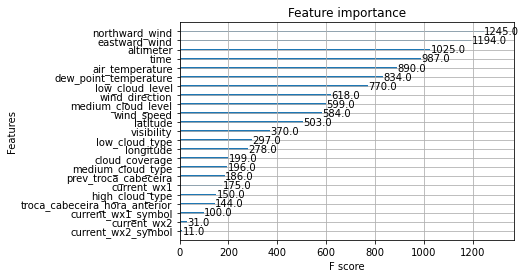

In [84]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

### Predicting on testing Dataset

In [13]:
dft1 = pd.read_excel("C:\\Users\\DELL\\Desktop\\EEF_DS_Challenge\\testing_set.xlsx")

In [14]:
df_fligthid = dft1["flightid"]

In [85]:
dft2 = categorical_to_numerical(dft1)
dft3 = droping_and_filling(dft2, 1)
dft3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   prev_troca_cabeceira           90715 non-null  int64  
 1   troca_cabeceira_hora_anterior  90715 non-null  int64  
 2   latitude                       90715 non-null  float64
 3   longitude                      90715 non-null  float64
 4   wind_direction                 90715 non-null  float64
 5   wind_speed                     90715 non-null  int64  
 6   visibility                     90715 non-null  int64  
 7   current_wx1                    90715 non-null  object 
 8   current_wx2                    90715 non-null  object 
 9   current_wx3                    90715 non-null  object 
 10  low_cloud_type                 90715 non-null  object 
 11  low_cloud_level                90715 non-null  float64
 12  medium_cloud_type              90715 non-null 

In [86]:
d = opt.predict(dft3)


In [87]:
# Convert the list to a pandas Series
my_series = pd.Series(d)

# Get value counts
value_counts = my_series.value_counts()

print(value_counts)

0    77599
1    13116
Name: count, dtype: int64


In [88]:
pred = pd.DataFrame({'espera': my_series})
dft4 = pd.concat([df_fligthid, pred], axis = 1)
dft4

,flightid,espera
0,45e7978b9d88f934cc06c11b6f0edba7,0
1,16ed22b3755aa9196d16fdd2a173c98f,0
2,b548d2c700496e2536d78caf626aee17,0
3,e4cc2545104bcfe978912d39f0960f4e,0
4,ace87fdae884359186e9851c38b146fb,1
...,...,...
90710,8ca8c4d16e592d65cd25d341113aecdf,0
90711,afde50d413c2374ab53cd3101332f9fc,0
90712,faeb2f6e744c606aee9e819ea1d62e6b,0
90713,3992d063be713b35d3bf46b79853880e,0
